In [1]:
import requests

url = 'https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json'
filename = 'sarcasm.json'

response = requests.get(url)

with open(filename, 'wb') as f:
    f.write(response.content)
    

In [5]:
import json

with open('./'+filename, 'r') as f:
    datastore = json.load(f)
    

In [4]:
datastore[0]

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
 'is_sarcastic': 0}

In [14]:
sentences =[]
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [15]:
print(len(sentences))
print(len(labels))

26709
26709


In [16]:
training_size = 20000
vocab_size = 10000
max_length = 32
embedding_dim = 16

In [17]:
import numpy as np


training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]

testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')

tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(training_sentences)
train_padded = pad_sequences(train_sequences, truncating='post', maxlen=max_length)


test_sequences = tokenizer.texts_to_sequences(testing_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating='post')



In [24]:
import tensorflow as tf

gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

sample_array = np.array([[[10,2], [1,3], [1,1]]])

print(f"shape of sample_array = {sample_array.shape}")
print(f"sample array: {sample_array}")

output = gap1d_layer(sample_array)

print(f"output shape of gap1d_layer : {output.shape}")
print(f"output array of gap1d_layer : {output.numpy()}")


shape of sample_array = (1, 3, 2)
sample array: [[[10  2]
  [ 1  3]
  [ 1  1]]]
output shape of gap1d_layer : (1, 2)
output array of gap1d_layer : [[4. 2.]]


In [22]:
import tensorflow as tf


model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
history = model.fit(train_padded, training_labels_final, epochs=30,
          validation_data = (test_padded, testing_labels_final))

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9917 - loss: 0.0237 - val_accuracy: 0.8080 - val_loss: 1.5510
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9965 - loss: 0.0120 - val_accuracy: 0.8059 - val_loss: 1.5554
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9976 - loss: 0.0090 - val_accuracy: 0.8041 - val_loss: 1.6270
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9952 - loss: 0.0143 - val_accuracy: 0.8027 - val_loss: 1.6530
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9958 - loss: 0.0132 - val_accuracy: 0.7943 - val_loss: 1.6080
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9960 - loss: 0.0135 - val_accuracy: 0.8016 - val_loss: 1.7938
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9967 - loss: 0.0109 - val_accuracy: 0.7995 - val_loss: 1.6967
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9969 - loss: 0.0110 - val_accuracy: 0.

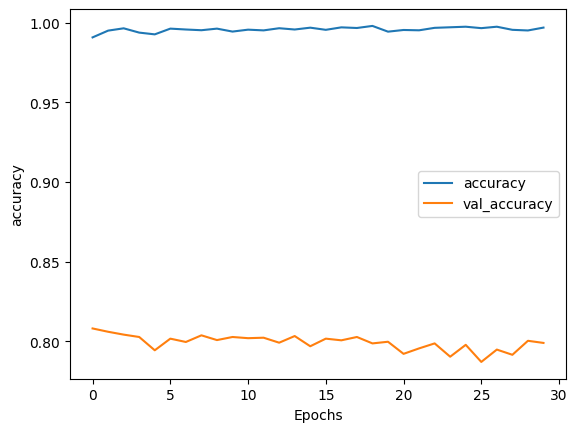

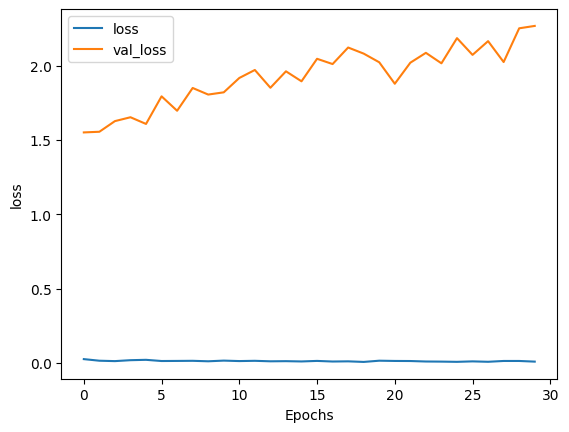

In [29]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")